<a href="https://colab.research.google.com/github/Knight6azer/Python-project-on-AIML/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv("acid_rain_pan_india_cleaned.csv")

In [5]:
df.head()

,Sampling_Date,State,Location,type,SO2_Concentration_ppm,NOx_Concentration_ppm,RSPM,SPM,PM2_5,Date,Month,Season,pH,Sulfate_SO4_mg_L,Nitrate_NO3_mg_L,Ammonium_NH4_mg_L,Calcium_Ca_mg_L,Chloride_Cl_mg_L,Conductivity_uS_cm,TDS_mg_L
0,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,83.0,209.0,36.0,1990-02-01,2.0,Winter,5.70,2.82,2.50,0.54,1.21,0.38,106.03,50.35
1,February - M021990,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,83.0,209.0,36.0,1990-02-01,2.0,Winter,5.32,3.31,2.73,0.97,1.19,0.95,86.29,68.90
2,February - M021990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,83.0,209.0,36.0,1990-02-01,2.0,Winter,5.79,2.67,4.25,2.86,1.14,1.06,87.55,29.73
3,March - M031990,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,83.0,209.0,36.0,1990-03-01,3.0,Summer,6.31,6.27,4.86,0.59,1.84,0.80,60.18,72.45
4,March - M031990,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,83.0,209.0,36.0,1990-03-01,3.0,Summer,5.26,6.28,3.58,1.78,1.70,1.37,109.62,59.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436642 entries, 0 to 436641
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Sampling_Date          436639 non-null  object 
 1   State                  436642 non-null  object 
 2   Location               436639 non-null  object 
 3   type                   431236 non-null  object 
 4   SO2_Concentration_ppm  436642 non-null  float64
 5   NOx_Concentration_ppm  436642 non-null  float64
 6   RSPM                   436642 non-null  float64
 7   SPM                    436642 non-null  float64
 8   PM2_5                  436642 non-null  float64
 9   Date                   436635 non-null  object 
 10  Month                  436635 non-null  float64
 11  Season                 436635 non-null  object 
 12  pH                     436642 non-null  float64
 13  Sulfate_SO4_mg_L       436642 non-null  float64
 14  Nitrate_NO3_mg_L       436642 non-nu

In [7]:
df.isnull().sum()

,0
Sampling_Date,3
State,0
Location,3
type,5406
SO2_Concentration_ppm,0
NOx_Concentration_ppm,0
RSPM,0
SPM,0
PM2_5,0
Date,7


In [8]:
df.describe()

,SO2_Concentration_ppm,NOx_Concentration_ppm,RSPM,SPM,PM2_5,Month,pH,Sulfate_SO4_mg_L,Nitrate_NO3_mg_L,Ammonium_NH4_mg_L,Calcium_Ca_mg_L,Chloride_Cl_mg_L,Conductivity_uS_cm,TDS_mg_L
count,436642.000000,436642.000000,436642.000000,436642.000000,436642.000000,436635.000000,436642.000000,436642.000000,436642.000000,436642.000000,436642.000000,436642.000000,436642.000000,436642.000000
mean,10.406110,25.538077,108.951126,206.876073,37.631608,6.503540,5.399309,6.002505,3.497554,1.998528,1.499447,0.850003,80.059752,49.970151
std,10.921311,18.322555,72.607860,122.024783,10.851103,3.440918,0.597992,2.309602,1.442217,0.865958,0.577470,0.375221,23.092390,17.337930
min,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,3.500000,2.000000,1.000000,0.500000,0.500000,0.200000,40.000000,20.000000
25%,4.300000,14.000000,58.000000,129.000000,36.000000,4.000000,4.990000,4.000000,2.250000,1.250000,1.000000,0.530000,60.060000,34.970000
50%,7.700000,21.700000,91.000000,187.000000,36.000000,6.000000,5.400000,6.000000,3.490000,2.000000,1.500000,0.850000,80.160000,49.950000
75%,13.000000,32.000000,141.000000,250.000000,36.000000,10.000000,5.800000,8.000000,4.750000,2.750000,2.000000,1.170000,100.060000,64.940000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000,12.000000,7.000000,10.000000,6.000000,3.500000,2.500000,1.500000,120.000000,80.000000


In [9]:
df.drop(columns=["type"], inplace=True)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
non_numeric_cols = df.select_dtypes(exclude=np.number).columns.tolist()

In [12]:
imputer_numeric = SimpleImputer(strategy='median')
df[numeric_cols] = imputer_numeric.fit_transform(df[numeric_cols])

In [13]:
imputer_non_numeric = SimpleImputer(strategy='most_frequent')
df[non_numeric_cols] = imputer_non_numeric.fit_transform(df[non_numeric_cols])

In [14]:
label_enc = LabelEncoder()
for col in non_numeric_cols:
  df[col] = label_enc.fit_transform(df[col])

In [15]:
df.head()

,Sampling_Date,State,Location,SO2_Concentration_ppm,NOx_Concentration_ppm,RSPM,SPM,PM2_5,Date,Month,Season,pH,Sulfate_SO4_mg_L,Nitrate_NO3_mg_L,Ammonium_NH4_mg_L,Calcium_Ca_mg_L,Chloride_Cl_mg_L,Conductivity_uS_cm,TDS_mg_L
0,4943,0,114,4.8,17.4,83.0,209.0,36.0,213,2.0,3,5.70,2.82,2.50,0.54,1.21,0.38,106.03,50.35
1,4943,0,114,3.1,7.0,83.0,209.0,36.0,213,2.0,3,5.32,3.31,2.73,0.97,1.19,0.95,86.29,68.90
2,4943,0,114,6.2,28.5,83.0,209.0,36.0,213,2.0,3,5.79,2.67,4.25,2.86,1.14,1.06,87.55,29.73
3,5006,0,114,6.3,14.7,83.0,209.0,36.0,214,3.0,2,6.31,6.27,4.86,0.59,1.84,0.80,60.18,72.45
4,5006,0,114,4.7,7.5,83.0,209.0,36.0,214,3.0,2,5.26,6.28,3.58,1.78,1.70,1.37,109.62,59.65


In [16]:
df.isnull().sum()

,0
Sampling_Date,0
State,0
Location,0
SO2_Concentration_ppm,0
NOx_Concentration_ppm,0
RSPM,0
SPM,0
PM2_5,0
Date,0
Month,0


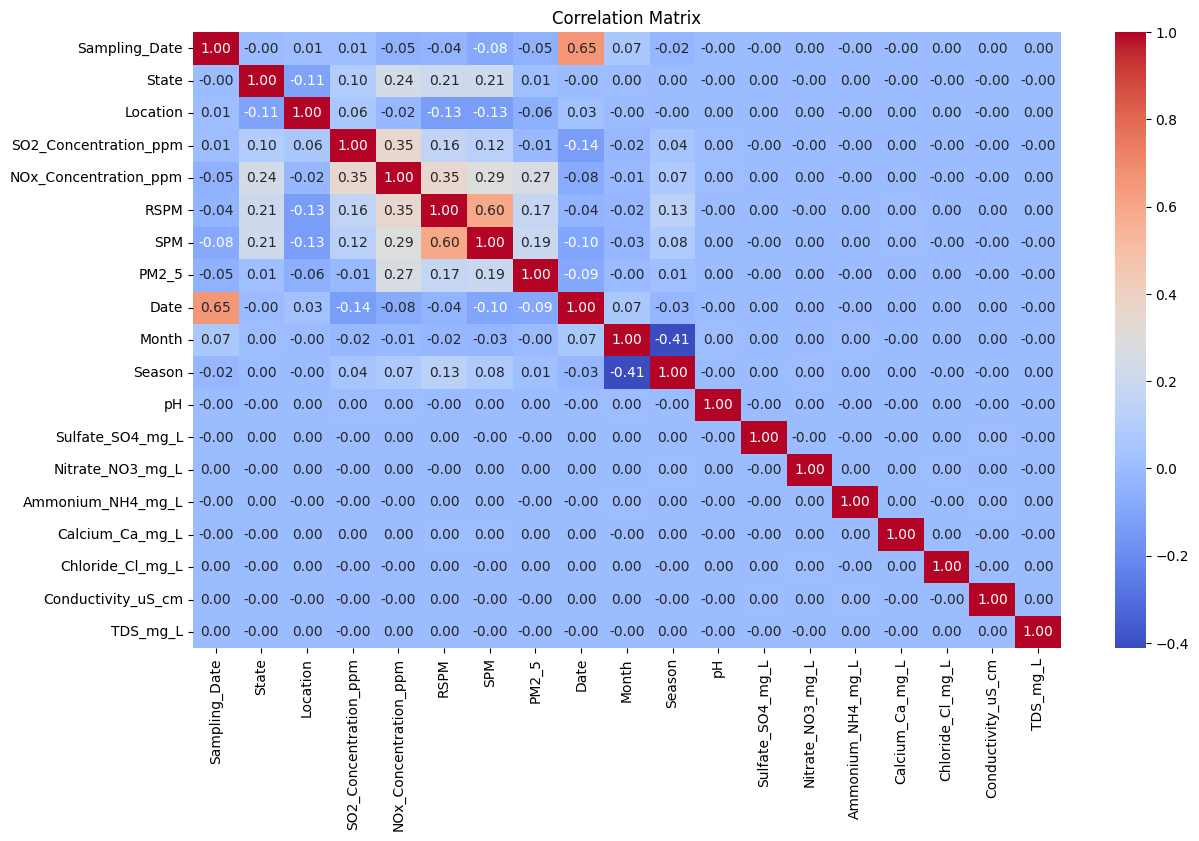

In [17]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

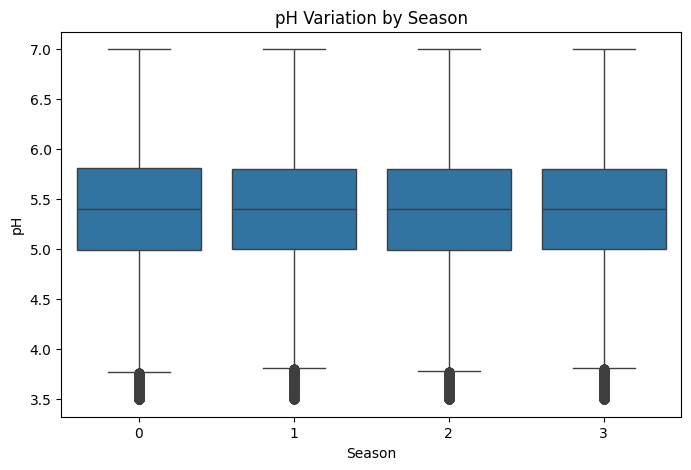

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Season", y="pH", data=df)
plt.title("pH Variation by Season")
plt.show()

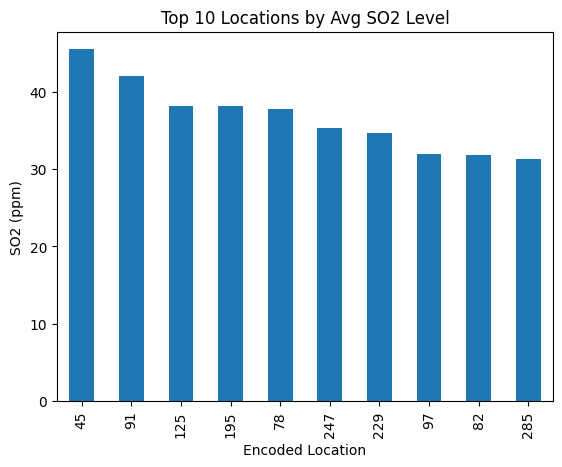

In [19]:
top_so2 = df.groupby("Location")["SO2_Concentration_ppm"].mean().sort_values(ascending=False).head(10)
top_so2.plot(kind='bar', title="Top 10 Locations by Avg SO2 Level")
plt.ylabel("SO2 (ppm)")
plt.xlabel("Encoded Location")
plt.show()

In [20]:
features = [col for col in df.columns if col != "pH"]
target = "pH"

x = df[features]
y = df[target]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Absolute Error: 0.4813924592904748
Mean Squared Error: 0.3617892806553604
R-squared Score: -0.013266987882902148


In [33]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [24]:
print("\nLinear Regression R2:", r2_score(y_test, y_pred_lr))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))


Linear Regression R2: -0.00014096184736778206
Random Forest R2: -0.013266987882902148


In [30]:
x_scaled = StandardScaler().fit_transform(x)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(x_scaled)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


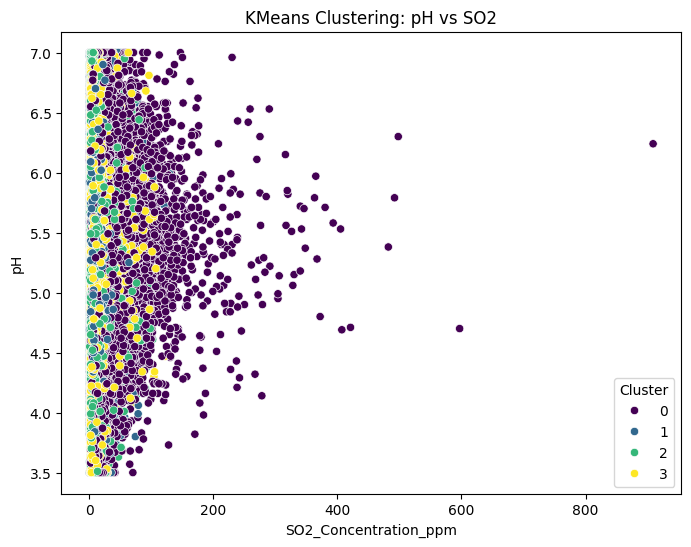

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="SO2_Concentration_ppm", y="pH", hue="Cluster", data=df, palette="viridis")
plt.title("KMeans Clustering: pH vs SO2")
plt.show()